In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [15]:
dt=pd.read_csv('/content/final_ransomware_dataset.csv')
dt.head(5)

,File Extension,File Size (bytes),File Hash,File Type,File Modified,Process Name,Process Hash,Process Memory Usage (bytes),Popular Pattern/Behavior,System Calls,Operating System,Used Method of Encryption,Time Taken for Encryption (seconds),Ransom Demanded (USD),Label
0,.onion,4658734,522c2b8dced4f2f13835af780a0f1ad83ead351107f40e...,ransomware,Yes,process_170.exe,446e4c87334d047d94b2861815a9a538,4401822,Mass File Modification,"write, accept, bind, open, bind",Windows,RSA-2048,9.89,35096,Ransomeware
1,.adobe,9469022,6a4c09297e2014bcde10a27d5479eec9fea801dea424ac...,ransomware,No,process_402.exe,28f76e30fc6979d7e55205852d46867b,5197954,Mass File Modification,"connect, write, accept, connect",macOS,RSA-2048,11.33,25429,Ransomeware
2,.banta,381518,1cfb88a06dccb99cb3ea3a20c53e728cc3385d834c7ccc...,ransomware,Yes,process_480.exe,63c6cbd91c2bbae02e2d2b54c6db4958,4541620,Suspicious File Access,"write, bind, read, execve, close",Windows,ChaCha20,9.66,1242,Ransomeware
3,.globe,8397133,9fc669e21eaceb6225816c1b3ca022f9a14e9704c7ee47...,ransomware,No,process_437.exe,2c5ca7609da6d93ec99afe5520b698c1,7778867,Mass File Modification,"connect, close, connect, open",Windows,RSA-2048,11.33,44634,Ransomeware
4,.docx,3512206,3d7f36a5fcd01df15c68005d2546543c221974227d7566...,text,No,process_333.exe,8f76f9ec8bbf5bfea6f84b6fbd087dd8,9515522,Normal,"connect, connect, execve, execve",Linux,NaN,0.00,0,Benign


In [16]:
dt.shape


(100, 15)

In [17]:
dt.isnull().sum()/len(dt)*100

,0
File Extension,0.0
File Size (bytes),0.0
File Hash,0.0
File Type,0.0
File Modified,0.0
Process Name,0.0
Process Hash,0.0
Process Memory Usage (bytes),0.0
Popular Pattern/Behavior,0.0
System Calls,0.0


In [18]:
dt.columns

Index(['File Extension', 'File Size (bytes)', 'File Hash', 'File Type',
       'File Modified', 'Process Name', 'Process Hash',
       'Process Memory Usage (bytes)', 'Popular Pattern/Behavior',
       'System Calls', 'Operating System', 'Used Method of Encryption',
       'Time Taken for Encryption (seconds)', 'Ransom Demanded (USD)',
       'Label'],
      dtype='object')

In [19]:
dt_cleaned = dt.dropna(thresh=len(dt) * 0.5, axis=1)


dt_cleaned.to_csv('cleaned_file.csv', index=False)

In [20]:
dt_cleaned.head()

,File Extension,File Size (bytes),File Hash,File Type,File Modified,Process Name,Process Hash,Process Memory Usage (bytes),Popular Pattern/Behavior,System Calls,Operating System,Time Taken for Encryption (seconds),Ransom Demanded (USD),Label
0,.onion,4658734,522c2b8dced4f2f13835af780a0f1ad83ead351107f40e...,ransomware,Yes,process_170.exe,446e4c87334d047d94b2861815a9a538,4401822,Mass File Modification,"write, accept, bind, open, bind",Windows,9.89,35096,Ransomeware
1,.adobe,9469022,6a4c09297e2014bcde10a27d5479eec9fea801dea424ac...,ransomware,No,process_402.exe,28f76e30fc6979d7e55205852d46867b,5197954,Mass File Modification,"connect, write, accept, connect",macOS,11.33,25429,Ransomeware
2,.banta,381518,1cfb88a06dccb99cb3ea3a20c53e728cc3385d834c7ccc...,ransomware,Yes,process_480.exe,63c6cbd91c2bbae02e2d2b54c6db4958,4541620,Suspicious File Access,"write, bind, read, execve, close",Windows,9.66,1242,Ransomeware
3,.globe,8397133,9fc669e21eaceb6225816c1b3ca022f9a14e9704c7ee47...,ransomware,No,process_437.exe,2c5ca7609da6d93ec99afe5520b698c1,7778867,Mass File Modification,"connect, close, connect, open",Windows,11.33,44634,Ransomeware
4,.docx,3512206,3d7f36a5fcd01df15c68005d2546543c221974227d7566...,text,No,process_333.exe,8f76f9ec8bbf5bfea6f84b6fbd087dd8,9515522,Normal,"connect, connect, execve, execve",Linux,0.00,0,Benign


In [22]:
dt_cleaned.isnull().sum()/len(dt_cleaned)*100

,0
File Extension,0.0
File Size (bytes),0.0
File Hash,0.0
File Type,0.0
File Modified,0.0
Process Name,0.0
Process Hash,0.0
Process Memory Usage (bytes),0.0
Popular Pattern/Behavior,0.0
System Calls,0.0


In [24]:
dt_cleaned.columns

Index(['File Extension', 'File Size (bytes)', 'File Hash', 'File Type',
       'File Modified', 'Process Name', 'Process Hash',
       'Process Memory Usage (bytes)', 'Popular Pattern/Behavior',
       'System Calls', 'Operating System',
       'Time Taken for Encryption (seconds)', 'Ransom Demanded (USD)',
       'Label'],
      dtype='object')

In [26]:
columns_to_retain= ['File Extension','File Size (bytes)','File Type','File Modified', 'Process Name','Process Memory Usage (bytes)', 'Popular Pattern/Behavior', 'System Calls', 'Operating System', 'Time Taken for Encryption (seconds)', 'Ransom Demanded (USD)', 'Label']
dt_cleaned= dt_cleaned.drop([col for col in dt_cleaned.columns if not col in columns_to_retain],axis=1)
dt_cleaned.dropna(axis=0)

,File Extension,File Size (bytes),File Type,File Modified,Process Name,Process Memory Usage (bytes),Popular Pattern/Behavior,System Calls,Operating System,Time Taken for Encryption (seconds),Ransom Demanded (USD),Label
0,.onion,4658734,ransomware,Yes,process_170.exe,4401822,Mass File Modification,"write, accept, bind, open, bind",Windows,9.89,35096,Ransomeware
1,.adobe,9469022,ransomware,No,process_402.exe,5197954,Mass File Modification,"connect, write, accept, connect",macOS,11.33,25429,Ransomeware
2,.banta,381518,ransomware,Yes,process_480.exe,4541620,Suspicious File Access,"write, bind, read, execve, close",Windows,9.66,1242,Ransomeware
3,.globe,8397133,ransomware,No,process_437.exe,7778867,Mass File Modification,"connect, close, connect, open",Windows,11.33,44634,Ransomeware
4,.docx,3512206,text,No,process_333.exe,9515522,Normal,"connect, connect, execve, execve",Linux,0.00,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...
95,.jpeg,8659503,document,Yes,process_8.exe,7500881,Normal,"connect, open, execve, write, bind",Windows,0.00,0,Benign
96,.decrypt,8821808,ransomware,No,process_696.exe,2189444,Suspicious File Access,"accept, accept, connect",Linux,8.56,7560,Ransomeware
97,.jpg,1579802,image,No,process_600.exe,779083,Normal,"accept, open, execve, bind, write, bind, connect",macOS,0.00,0,Benign
98,.harma,1401031,ransomware,Yes,process_613.exe,9072270,Critical Behavior,"write, execve, write, connect",macOS,6.49,2382,Ransomeware


In [27]:
columns_to_retain1= ['File Size (bytes)','File Type','File Modified','Process Memory Usage (bytes)', 'Popular Pattern/Behavior', 'Operating System', 'Time Taken for Encryption (seconds)', 'Ransom Demanded (USD)', 'Label']
dt_cleaned1= dt_cleaned.drop([col for col in dt_cleaned.columns if not col in columns_to_retain1],axis=1)
dt_cleaned1.dropna(axis=0)

,File Size (bytes),File Type,File Modified,Process Memory Usage (bytes),Popular Pattern/Behavior,Operating System,Time Taken for Encryption (seconds),Ransom Demanded (USD),Label
0,4658734,ransomware,Yes,4401822,Mass File Modification,Windows,9.89,35096,Ransomeware
1,9469022,ransomware,No,5197954,Mass File Modification,macOS,11.33,25429,Ransomeware
2,381518,ransomware,Yes,4541620,Suspicious File Access,Windows,9.66,1242,Ransomeware
3,8397133,ransomware,No,7778867,Mass File Modification,Windows,11.33,44634,Ransomeware
4,3512206,text,No,9515522,Normal,Linux,0.00,0,Benign
...,...,...,...,...,...,...,...,...,...
95,8659503,document,Yes,7500881,Normal,Windows,0.00,0,Benign
96,8821808,ransomware,No,2189444,Suspicious File Access,Linux,8.56,7560,Ransomeware
97,1579802,image,No,779083,Normal,macOS,0.00,0,Benign
98,1401031,ransomware,Yes,9072270,Critical Behavior,macOS,6.49,2382,Ransomeware


In [32]:
for column in dt_cleaned1.columns:
  if dt_cleaned1[column].dtype == np.number:
    continue
  dt_cleaned1[column]= LabelEncoder().fit_transform(dt_cleaned1[column])

<ipython-input-32-68a04b759f51>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dt_cleaned1[column].dtype == np.number:
<ipython-input-32-68a04b759f51>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dt_cleaned1[column].dtype == np.number:
<ipython-input-32-68a04b759f51>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dt_cleaned1[column].dtype == np.number:
<ipython-input-32-68a04b759f51>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dt_cleaned1[column].dtype == np.number:
<ipython-input-32-68a04b759f51>:2: DeprecationWarning: Converting `np.inexact` o

In [33]:
dt_cleaned1.head(5)

,File Size (bytes),File Type,File Modified,Process Memory Usage (bytes),Popular Pattern/Behavior,Operating System,Time Taken for Encryption (seconds),Ransom Demanded (USD),Label
0,45,2,1,40,1,1,9.89,32,1
1,96,2,0,49,1,2,11.33,26,1
2,2,2,1,42,3,1,9.66,2,1
3,75,2,0,70,1,1,11.33,37,1
4,35,3,0,91,2,0,0.00,0,0


<Axes: xlabel='Label', ylabel='count'>

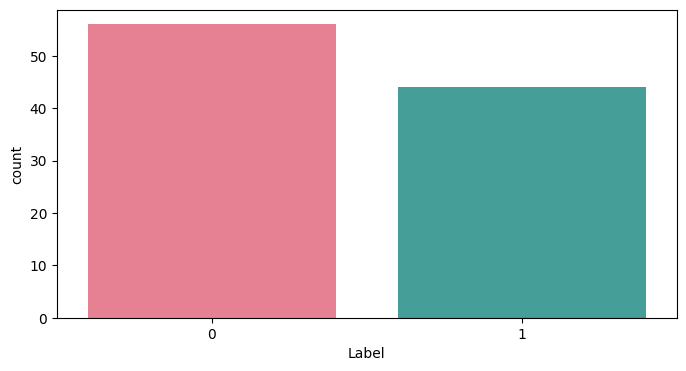

In [35]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,4))
sns.countplot(x='Label',data=dt_cleaned1,palette='husl')

In [37]:
X= dt_cleaned1.drop(['Label'],axis=1)
Y= dt_cleaned1['Label']

In [38]:
X

,File Size (bytes),File Type,File Modified,Process Memory Usage (bytes),Popular Pattern/Behavior,Operating System,Time Taken for Encryption (seconds),Ransom Demanded (USD)
0,45,2,1,40,1,1,9.89,32
1,96,2,0,49,1,2,11.33,26
2,2,2,1,42,3,1,9.66,2
3,75,2,0,70,1,1,11.33,37
4,35,3,0,91,2,0,0.00,0
...,...,...,...,...,...,...,...,...
95,83,0,1,67,2,1,0.00,0
96,85,2,0,24,3,0,8.56,9
97,12,1,0,10,2,2,0.00,0
98,10,2,1,83,0,2,6.49,5


In [39]:
Y

,Label
0,1
1,1
2,1
3,1
4,0
...,...
95,0
96,1
97,0
98,1


**FEATURE SCALLING**

In [40]:
scaler=MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [41]:
x_test.shape

(20, 8)

In [42]:
x_train.shape

(80, 8)

In [43]:
from sklearn.linear_model import LinearRegression as LR
model = LR()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test)

In [45]:
y_test

,Label
83,0
53,1
70,1
45,1
44,0
39,0
22,1
80,0
10,0
0,1


In [46]:
from sklearn import metrics
# Mean  Absolute  Error
MAE = metrics.mean_absolute_error(y_test,y_pred)
print('Mean  Absolute  Error',MAE)
# Mean Squared Error
MSE = metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error',MSE)
# Root mean square Error
RMSE = np.sqrt(MSE)
print('Root mean square Error',RMSE)
# R2
R2 = metrics.r2_score(y_test,y_pred)
print('R2 Score is',R2)

Mean  Absolute  Error 0.1766384947601253
Mean Squared Error 0.06845629034975365
Root mean square Error 0.26164153024654485
R2 Score is 0.7234089278797833


In [48]:
n = len(dt_cleaned1)
p = dt_cleaned1.shape[1]
Adj_R2 = 1 - ( (1 - R2) * (n - 1) / (n - p - 1))
print('Adjusted_R2',Adj_R2)

Adjusted_R2 0.6957498206677616


In [49]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression ()
lg.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred=lg.predict(x_test)

In [51]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [52]:
y_test.values

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, ConfusionMatrixDisplay
ACC=accuracy_score(y_test,y_pred)
print(ACC*100)

90.0


**CONFUSION MATRICS**

In [54]:
CM=confusion_matrix(y_test,y_pred) ## diagonal value high----its good
CM

array([[11,  0],
       [ 2,  7]])

<Figure size 800x400 with 0 Axes>

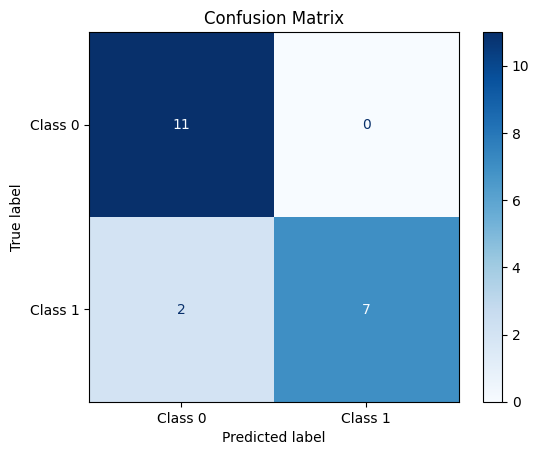

In [55]:
disp =ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Class 0', 'Class 1'])
plt.figure(figsize=(8,4))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<Figure size 800x400 with 0 Axes>

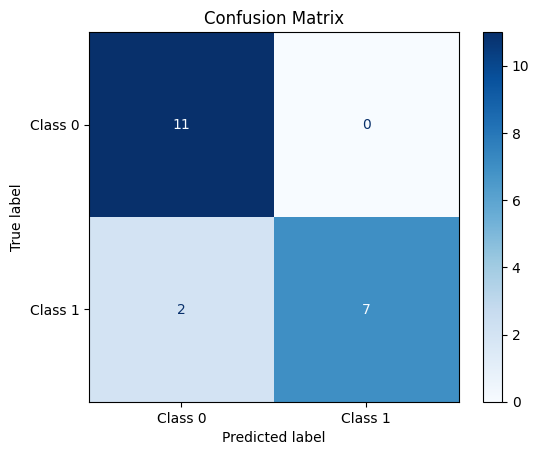

In [57]:
print(ACC*100)

90.0
